Why are these riboswitches called AND-1 and OR-1?

It is named by its logic function. Here the input is whether to add the DNA binding to the OBS. AND-1 means it needs two DNA to promote the self-cleave. OR-1 means either DNA could make it cut itself.

Will the AND-1 riboswitch cleave itself when both of its OBS are bound? 

Yes.

Will the OR-1 riboswitch cleave itself when neither of its OBS are bound? 

No.

What behavior do we expect from the YES-1 riboswitch?

If its OBS is bound, it can cleave itself.

## Task1
Establish a **table** containing **Riboswitch name, start and end coordinates of OBS-1, start and end coordinates of OBS-2, start 
and end coordinates of the two red regions**

In [8]:
import sqlite3
lab5 = sqlite3.connect('lab5.db')
lab = lab5.cursor()
lab.execute("""CREATE TABLE logic(id INT,
                                  name TEXT,
                                  OBS1 TEXT,
                                  OBS2 TEXT,
                                  red1 TEXT,
                                  red2 TEXT);""")

lab = lab5.cursor()
lab.execute("""INSERT INTO logic(id,
                               name,
                               OBS1,
                               OBS2,
                               red1,
                               red2)
                         VALUES(1,
                                'YES-1',
                                '(26,47)',
                                '',
                                '(16,21)',
                                '(49,54)');""")

lab = lab5.cursor()
lab.execute("""INSERT INTO logic(id,
                               name,
                               OBS1,
                               OBS2,
                               red1,
                               red2)
                         VALUES(2,
                                'NOT-1',
                                '(26,47)',
                                '',
                                '(16,21)',
                                '(49,54)');""")

lab = lab5.cursor()
lab.execute("""INSERT INTO logic(id,
                               name,
                               OBS1,
                               OBS2,
                               red1,
                               red2)
                         VALUES(3,
                                'AND-1',
                                '(30,45)',
                                '(49,64)',
                                '(16,23)',
                                '(70,77)');""")

lab = lab5.cursor()
lab.execute("""INSERT INTO logic(id,
                               name,
                               OBS1,
                               OBS2,
                               red1,
                               red2)
                         VALUES(4,
                                'OR-1',
                                '(27,46)',
                                '(47,66)',
                                '(16,26)',
                                '(70,77)');""")

## Task 2 The meat of assignment

Are they the same? 

No, I don't think so according to my result. AND-1_con, NOT-1 and NOT-1_con are bascially the same. However The others are totally different.


Are there any stem-loop structures that don’t match up? 

Yes, so many.

What might explain the differences? 

I suppose the agrithom is different since the paper is pubished in 2007.
And also, maybe I don't consider the experiment condition.

In [2]:
import subprocess
YES_1_seqs = \
"""GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC"""
p = subprocess.run(['RNAfold'],
                  input=bytes(YES_1_seqs,'ascii'),
                  stdout = subprocess.PIPE,
                  stderr = subprocess.PIPE)
print("***This is what I have on command!***")
print(p.stderr.decode())

svg_YES_1 = p.stdout.decode()
print("***And my output file***")
print(p.stdout.decode())

f1 = open('YES-1.txt','w')
f1.write(svg_YES_1)
f1.close

***This is what I have on command!***

***And my output file***
GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((.(((((((((.......))))))))).((.((.(((...))).))))..(((((....))))).)))))))) (-33.00)



<function TextIOWrapper.close()>

I use another way to generate the plot of RNA, because **os.system** can not produce the whole picture of RNA structure.
My operation is as follows.
#### Cancel the number like Gibbson free energy
'$: sed -i 's/ \(.*\)$//' myfold.txt'
#### Generate the .svg plot
$: cat myfold.txt | RNAplot -o svg

And finally, I use [CloudCovert](https://cloudconvert.com/svg-to-pdf) to transform the .svg to .pdf.

In [3]:
import os
os.system("ps2pdf rna.ps YES-1.pdf")

0

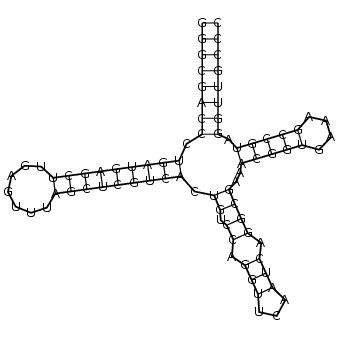

In [11]:
from wand.image import Image as WImage
img = WImage(filename='YES-1.pdf')
img

In [14]:
YES_1_seqs_con = \
"""GGGCGACCCUGAUGAGCUUGAGUUUxxxxxxxxxxxxxxxxxxxxxxxAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC"""

p = subprocess.run(['RNAfold','-C'],
                  input=bytes(YES_1_seqs_con,'ascii'),
                  stdout = subprocess.PIPE,
                  stderr = subprocess.PIPE)
print("***This is what I have on command!***")
print(p.stderr.decode())

svg_YES_1_con = p.stdout.decode()
print("***And my output file***")
print(p.stdout.decode())

***This is what I have on command!***

***And my output file***
GGGCGACCCUGAUGAGCUUGAGUUUxxxxxxxxxxxxxxxxxxxxxxxAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((.......((((((............................))))))...(((((....))))).)))))))) (-24.40)



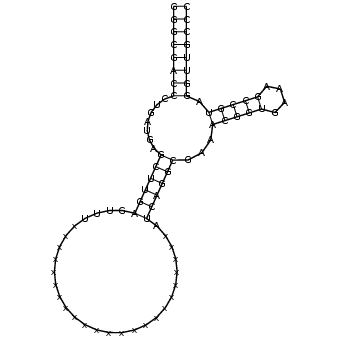

In [10]:
from wand.image import Image as WImage
img = WImage(filename='YES-1_con.pdf')
img

In [ ]:
#import os
#os.system("ps2pdf rna.ps YES-1_con.pdf")

In [5]:
NOT_1_seqs = \
"""GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC"""

p = subprocess.run(['RNAfold'],
                  input=bytes(NOT_1_seqs,'ascii'),
                  stdout = subprocess.PIPE,
                  stderr = subprocess.PIPE)
print("***This is what I have on command!***")
print(p.stderr.decode())

svg_NOT_1 = p.stdout.decode()
print("***And my output file***")
print(p.stdout.decode())

f1 = open('NOT-1.txt','w')
f1.write(svg_NOT_1)
f1.close

#import os
#os.system("ps2pdf rna.ps YES-1.pdf")

***This is what I have on command!***

***And my output file***
GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
.((((....((((((.......((((......))))...((((((.((((..(((......)))..)))).)))))).))))))....)))) (-28.10)



<function TextIOWrapper.close()>

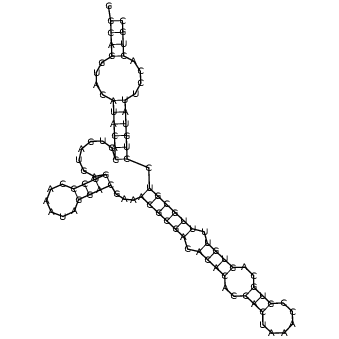

In [13]:
from wand.image import Image as WImage
img = WImage(filename='NOT-1.pdf')
img

In [4]:
NOT_1_seqs_con = \
"""GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCxxxxxxxxxxxxxxxxxxxxxxxGUGUUUUGCGUCCUGUAUUCCACUGC"""

p = subprocess.run(['RNAfold'],
                  input=bytes(NOT_1_seqs_con,'ascii'),
                  stdout = subprocess.PIPE,
                  stderr = subprocess.PIPE)
print("***This is what I have on command!***")
print(p.stderr.decode())

svg_NOT_1_con = p.stdout.decode()
print("***And my output file***")
print(p.stdout.decode())

f1 = open('NOT-1_con.txt','w')
f1.write(svg_NOT_1_con)
f1.close

#import os
#os.system("ps2pdf rna.ps YES-1.pdf")

***This is what I have on command!***

***And my output file***
GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCxxxxxxxxxxxxxxxxxxxxxxxGUGUUUUGCGUCCUGUAUUCCACUGC
.((((....((((((..((((.((((......))))(((((((.......................))))))).))))))))))....)))) (-19.30)



<function TextIOWrapper.close()>

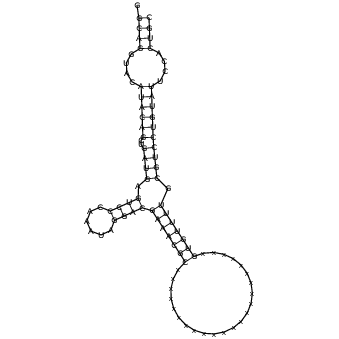

In [14]:
from wand.image import Image as WImage
img = WImage(filename='NOT-1_con.pdf')
img

In [6]:
AND_1_seqs = \
"""GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU"""

p = subprocess.run(['RNAfold'],
                  input=bytes(AND_1_seqs,'ascii'),
                  stdout = subprocess.PIPE,
                  stderr = subprocess.PIPE)
print("***This is what I have on command!***")
print(p.stderr.decode())

svg_AND_1 = p.stdout.decode()
print("***And my output file***")
print(p.stdout.decode())

f1 = open('AND-1.txt','w')
f1.write(svg_AND_1)
f1.close

#import os
#os.system("ps2pdf rna.ps YES-1.pdf")

***This is what I have on command!***

***And my output file***
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
((((((((((((((((((((...(((.....(((.(((.......))).))).....)))..))))))).))))).....(((((....))))).))))))))......... (-42.10)



<function TextIOWrapper.close()>

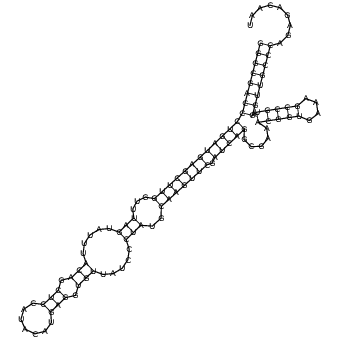

In [15]:
from wand.image import Image as WImage
img = WImage(filename='AND-1.pdf')
img

In [8]:
AND_1_seqs_TF = \
"""GGGCGACCCUGAUGAGCUUGGUUUAGUAUxxxxxxxxxxxxxxxxGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU"""

p = subprocess.run(['RNAfold'],
                  input=bytes(AND_1_seqs_TF,'ascii'),
                  stdout = subprocess.PIPE,
                  stderr = subprocess.PIPE)
print("***This is what I have on command!***")
print(p.stderr.decode())

svg_AND_1_TF = p.stdout.decode()
print("***And my output file***")
print(p.stdout.decode())

f1 = open('AND-1_TF.txt','w')
f1.write(svg_AND_1_TF)
f1.close


***This is what I have on command!***

***And my output file***
GGGCGACCCUGAUGAGCUUGGUUUAGUAUxxxxxxxxxxxxxxxxGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
((((((((((((((((((((..........................(((.(....))))...))))))).))))).....(((((....))))).))))))))......... (-33.90)



<function TextIOWrapper.close()>

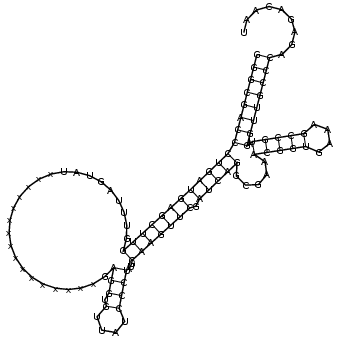

In [16]:
from wand.image import Image as WImage
img = WImage(filename='AND-1_TF.pdf')
img

In [9]:
AND_1_seqs_FT = \
"""GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGxxxxxxxxxxxxxxxxAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU"""

p = subprocess.run(['RNAfold'],
                  input=bytes(AND_1_seqs_FT,'ascii'),
                  stdout = subprocess.PIPE,
                  stderr = subprocess.PIPE)
print("***This is what I have on command!***")
print(p.stderr.decode())

svg_AND_1_FT = p.stdout.decode()
print("***And my output file***")
print(p.stdout.decode())

f1 = open('AND-1_FT.txt','w')
f1.write(svg_AND_1_FT)
f1.close

***This is what I have on command!***

***And my output file***
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGxxxxxxxxxxxxxxxxAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
(((((((((((((((((((((...(((.......))))))........................))))).))))).....(((((....))))).))))))))......... (-29.60)



<function TextIOWrapper.close()>

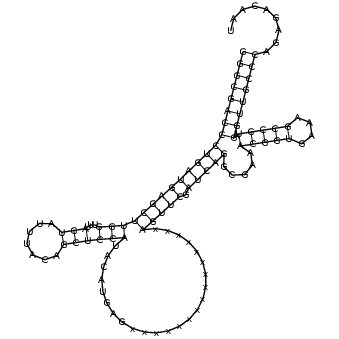

In [17]:
from wand.image import Image as WImage
img = WImage(filename='AND-1_FT.pdf')
img

In [10]:
AND_1_seqs_TT = \
"""GGGCGACCCUGAUGAGCUUGGUUUAGUAUxxxxxxxxxxxxxxxxGAGxxxxxxxxxxxxxxxxAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU"""

p = subprocess.run(['RNAfold'],
                  input=bytes(AND_1_seqs_TT,'ascii'),
                  stdout = subprocess.PIPE,
                  stderr = subprocess.PIPE)
print("***This is what I have on command!***")
print(p.stderr.decode())

svg_AND_1_TT = p.stdout.decode()
print("***And my output file***")
print(p.stdout.decode())

f1 = open('AND-1_TT.txt','w')
f1.write(svg_AND_1_TT)
f1.close


***This is what I have on command!***

***And my output file***
GGGCGACCCUGAUGAGCUUGGUUUAGUAUxxxxxxxxxxxxxxxxGAGxxxxxxxxxxxxxxxxAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
((((((((((((((((((..............................................))))).))))).....(((((....))))).))))))))......... (-27.54)



<function TextIOWrapper.close()>

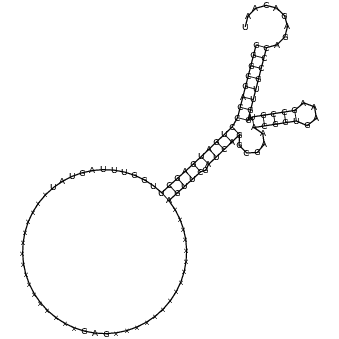

In [19]:
from wand.image import Image as WImage
img = WImage(filename='AND-1_TT.pdf')
img

In [3]:
OR_1_seqs = \
"""GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC"""

p = subprocess.run(['RNAfold'],
                  input=bytes(OR_1_seqs,'ascii'),
                  stdout = subprocess.PIPE,
                  stderr = subprocess.PIPE)
print("***This is what I have on command!***")
print(p.stderr.decode())

svg_OR_1 = p.stdout.decode()
print("***And my output file***")
print(p.stdout.decode())

f1 = open('OR-1.txt','w')
f1.write(svg_OR_1)
f1.close


***This is what I have on command!***

***And my output file***
GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((((((((((((((((.(((.....(((.(((.......))).))).)))...)).))))))).))))).....(((((....))))).)))))))) (-40.00)



<function TextIOWrapper.close()>

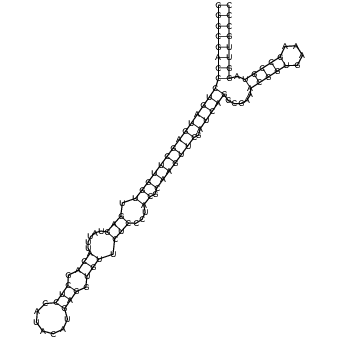

In [20]:
from wand.image import Image as WImage
img = WImage(filename='OR-1.pdf')
img

In [4]:
OR_1_seqs_TF = \
"""GGGCGACCCUGAUGAGCUUGGUUGAGxxxxxxxxxxxxxxxxxxxxAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC"""

p = subprocess.run(['RNAfold'],
                  input=bytes(OR_1_seqs_TF,'ascii'),
                  stdout = subprocess.PIPE,
                  stderr = subprocess.PIPE)
print("***This is what I have on command!***")
print(p.stderr.decode())

svg_OR_1_TF = p.stdout.decode()
print("***And my output file***")
print(p.stdout.decode())

f1 = open('OR-1_TF.txt','w')
f1.write(svg_OR_1_TF)
f1.close


***This is what I have on command!***

***And my output file***
GGGCGACCCUGAUGAGCUUGGUUGAGxxxxxxxxxxxxxxxxxxxxAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((((((((((((((((.(((...........................)))...)).))))))).))))).....(((((....))))).)))))))) (-33.10)



<function TextIOWrapper.close()>

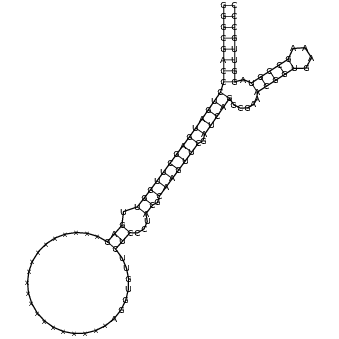

In [21]:
from wand.image import Image as WImage
img = WImage(filename='OR-1_TF.pdf')
img

In [5]:
OR_1_seqs_FT = \
"""GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGxxxxxxxxxxxxxxxxxxxxUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC"""

p = subprocess.run(['RNAfold'],
                  input=bytes(OR_1_seqs_FT,'ascii'),
                  stdout = subprocess.PIPE,
                  stderr = subprocess.PIPE)
print("***This is what I have on command!***")
print(p.stderr.decode())

svg_OR_1_FT = p.stdout.decode()
print("***And my output file***")
print(p.stdout.decode())

f1 = open('OR-1_FT.txt','w')
f1.write(svg_OR_1_FT)
f1.close


***This is what I have on command!***

***And my output file***
GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGxxxxxxxxxxxxxxxxxxxxUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((.......(((((((((((........................................)))))))))))...(((((....))))).)))))))) (-29.09)



<function TextIOWrapper.close()>

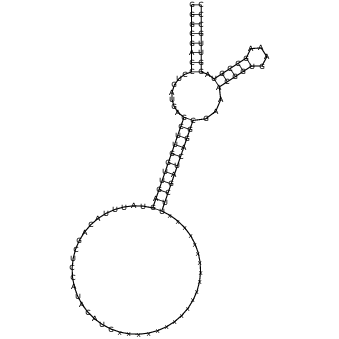

In [22]:
from wand.image import Image as WImage
img = WImage(filename='OR-1_FT.pdf')
img

In [6]:
OR_1_seqs_TT = \
"""GGGCGACCCUGAUGAGCUUGGUUGAG.xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC"""

p = subprocess.run(['RNAfold'],
                  input=bytes(OR_1_seqs_TT,'ascii'),
                  stdout = subprocess.PIPE,
                  stderr = subprocess.PIPE)
print("***This is what I have on command!***")
print(p.stderr.decode())

svg_OR_1_TT = p.stdout.decode()
print("***And my output file***")
print(p.stdout.decode())

f1 = open('OR-1_TT.txt','w')
f1.write(svg_OR_1_TT)
f1.close

***This is what I have on command!***

***And my output file***
GGGCGACCCUGAUGAGCUUGGUUGAG.xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((.......((((((((((...........................................))))))))))...(((((....))))).)))))))) (-28.82)



<function TextIOWrapper.close()>

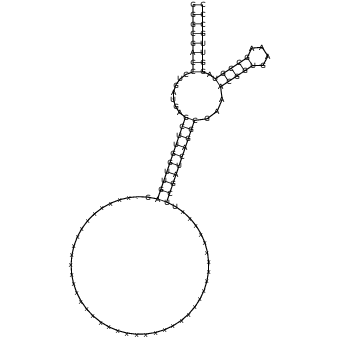

In [23]:
from wand.image import Image as WImage
img = WImage(filename='OR-1_TT.pdf')
img

According to your results, do the AND-1 and OR-1 riboswitches work as the paper claims?

No, they totally mismatch with each other.